<a href="https://colab.research.google.com/github/Herzanet002/ML2023/blob/main/MultilayerPerceptionVsDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [591]:
import pandas as pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [592]:
dataset = pandas.read_csv("/content/sample_data/smoke_detection_iot.csv")
dataset.drop(['Unnamed: 0', 'UTC'], axis=1, inplace=True)
dataset.head(10)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.00,0.0,0.000,0.00,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.00,0.0,0.000,0.00,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.00,0.0,0.000,0.00,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.00,0.0,0.000,0.00,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.00,0.0,0.000,0.00,4,0
5,20.073,54.12,0,400,12419,18998,939.725,0.0,0.00,0.0,0.000,0.00,5,0
6,20.088,53.61,0,400,12432,19058,939.738,0.0,0.00,0.0,0.000,0.00,6,0
7,20.103,53.20,0,400,12439,19114,939.758,0.0,0.00,0.0,0.000,0.00,7,0
8,20.117,52.81,0,400,12448,19155,939.758,0.0,0.00,0.0,0.000,0.00,8,0
9,20.132,52.46,0,400,12453,19195,939.756,0.9,3.78,0.0,4.369,2.78,9,0


In [593]:
dataset['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

In [594]:
x_data = dataset.loc[:, "Temperature[C]":"CNT"]
x_data

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742


In [595]:
y_data = dataset["Fire Alarm"]
y_data

0        0
1        0
2        0
3        0
4        0
        ..
62625    0
62626    0
62627    0
62628    0
62629    0
Name: Fire Alarm, Length: 62630, dtype: int64

In [596]:
from sklearn.preprocessing import RobustScaler
data_scaled= RobustScaler()
x_scaled=data_scaled.fit_transform(x_data)
x_scaled

array([[-0.00901823,  1.26269702, -0.92634561, ..., -2.24624277,
        -2.44444444, -0.68953802],
       [-0.00797766,  1.14185639, -0.92634561, ..., -2.24624277,
        -2.44444444, -0.68946416],
       [-0.00700647,  1.01751313, -0.92634561, ..., -2.24624277,
        -2.44444444, -0.6893903 ],
       ...,
       [-0.08761555, -6.00875657, -0.33427762, ..., -1.53294798,
        -1.66666667, -0.26551941],
       [-0.07263141, -5.9737303 , -0.32389046, ..., -1.53988439,
        -1.66666667, -0.26544555],
       [-0.05764728, -5.88966725, -0.31916903, ..., -1.54450867,
        -1.66666667, -0.26537169]])

In [597]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_data, test_size=0.3) #70-train, 30%-tests

In [598]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print("Доля правильных ответов на тренировочном сете: {:.4f}".format(classifier.score(x_train, y_train)))
print("Доля правильных ответов на тестовом сете: {:.4f}".format(classifier.score(x_test, y_test)))

Доля правильных ответов на тренировочном сете: 1.0000
Доля правильных ответов на тестовом сете: 1.0000


In [599]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score
roc_auc_score(y_test, y_pred),f1_score(y_test, y_pred),recall_score(y_test, y_pred)

(1.0, 1.0, 1.0)

In [600]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 5350,     0],
       [    0, 13439]])

In [601]:
entr_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)
entr_classifier.fit(x_train, y_train)
y1_pred = entr_classifier.predict(x_test)

print("Доля правильных ответов на тренировочном сете: {:.4f}".format(entr_classifier.score(x_train, y_train)))
print("Доля правильных ответов на тестовом сете: {:.4f}".format(entr_classifier.score(x_test, y_test)))

Доля правильных ответов на тренировочном сете: 0.9805
Доля правильных ответов на тестовом сете: 0.9787


In [602]:
#Случайный лес
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

rand_forest_classifier = RandomForestClassifier(n_estimators=5, bootstrap = True, max_features = 'sqrt', random_state=2, max_depth=4)
rand_forest_classifier = rand_forest_classifier.fit(x_train, y_train)
y_pred = rand_forest_classifier.predict(x_test)

print("Доля правильных ответов на тренировочном сете: {:.4f}".format(rand_forest_classifier.score(x_train, y_train)))
print("Доля правильных ответов на тестовом сете: {:.4f}".format(rand_forest_classifier.score(x_test, y_test)))

Доля правильных ответов на тренировочном сете: 0.9995
Доля правильных ответов на тестовом сете: 0.9996


In [603]:
# многослойный перцептрон

In [604]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
data_scaled = MinMaxScaler()
x_data = dataset.loc[:, "Temperature[C]":"CNT"]
y_data = dataset["Fire Alarm"]
x_scaled=data_scaled.fit_transform(x_data)
X = pd.DataFrame(x_scaled, columns=x_data.columns)
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.3)

In [605]:
X_train.shape

(43841, 13)

In [606]:
X_test.shape

(18789, 13)

In [607]:
Y_test.shape

(18789,)

In [608]:
import torch
import numpy as np

X_train = torch.from_numpy(X_train.values.astype(np.float32))
Y_train = torch.from_numpy(Y_train.values.astype(np.float32))

X_test = torch.from_numpy(X_test.values.astype(np.float32))
Y_test = torch.from_numpy(Y_test.values.astype(np.float32))

In [609]:
from torch.utils.data import TensorDataset, DataLoader

train_ds = TensorDataset(X_train, Y_train)
test_ds = TensorDataset(X_test, Y_test)

BATCH_SIZE = 32
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=True)

In [610]:
from torch import nn

model = nn.Sequential(
    nn.Linear(13, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1),
    nn.Sigmoid()
)

print(model)

Sequential(
  (0): Linear(in_features=13, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=1, bias=True)
  (7): Sigmoid()
)


In [611]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)

In [612]:
loss_fn = nn.MSELoss()
LEARNING_RATE = 1e-5
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [613]:
EPOCHS = 10
losses = []
model.train()
        
for epoch in range(EPOCHS):
    epoch_loss = 0
    train_accuracy = 0
    for i, data in enumerate(train_dl):
        optimizer.zero_grad()
        x_batch , y_batch = data
        x_batch = x_batch.to(device)
        y_batch = y_batch.unsqueeze(1).float()
        y_batch = y_batch.to(device)

        yhat = model(x_batch)
        loss = loss_fn(yhat, y_batch)
        train_accuracy += y_batch.eq(torch.round(yhat)).sum() / len(x_batch)

        loss.backward()
        optimizer.step()
       
        epoch_loss += loss.item()
    
    losses.append(epoch_loss/len(train_dl))
    print('\nEpoch : {}, train loss : {}, acc : {}'.format(epoch+1, epoch_loss, train_accuracy / len(train_dl)))


Epoch : 1, train loss : 161.84202672533021, acc : 0.8802881240844727

Epoch : 2, train loss : 63.717084164132416, acc : 0.9514496922492981

Epoch : 3, train loss : 55.4896222821551, acc : 0.9575583338737488

Epoch : 4, train loss : 53.50680075264409, acc : 0.9588347673416138

Epoch : 5, train loss : 48.41403439703291, acc : 0.9631199836730957

Epoch : 6, train loss : 46.571893281742646, acc : 0.9643280506134033

Epoch : 7, train loss : 36.17796676260731, acc : 0.9715763926506042

Epoch : 8, train loss : 26.139312860307722, acc : 0.9785512685775757

Epoch : 9, train loss : 21.221373376590247, acc : 0.9829276204109192

Epoch : 10, train loss : 22.097448380431555, acc : 0.9823577404022217


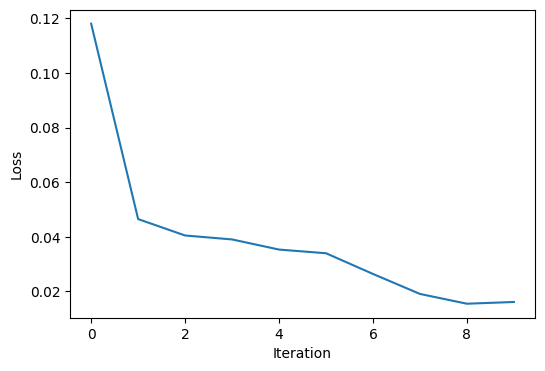

In [614]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(range(len(losses)), losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

In [615]:
it = iter(test_ds)
x, y = next(it)
x, y

(tensor([1.8810e+01, 4.8720e+01, 3.6000e+01, 4.0000e+02, 1.3129e+04, 2.0021e+04,
         9.3962e+02, 7.1000e-01, 7.4000e-01, 4.8800e+00, 7.6100e-01, 1.7000e-02,
         1.7840e+03]),
 tensor(0.))

In [616]:
with torch.no_grad():
  y_pred = model(x)
y_pred

tensor([3.9067e-12])

In [617]:
abs(y - y_pred)

tensor([3.9067e-12])

In [618]:
with torch.no_grad():
  outp = model(X_test)
Y_pred = torch.reshape(outp, (-1,))
print(torch.mean(torch.abs(Y_pred - Y_test)))

tensor(0.0118)


In [619]:
predictions = model(X_test)
valid = [1 if torch.argmax(p) == l else 0 for p, l in zip(predictions, Y_test)]
sum(valid) / len(valid)

0.2881473202405663